In [1]:
import numpy as np
import pandas as pd

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Mythology
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Historical Fiction
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,Military History
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Science/Medical History
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,Archaeology/History


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
print(books.shape)
print(ratings.shape)

(24831, 9)
(1149780, 3)


In [6]:
books.isnull().sum()

ISBN                   1
Book-Title             1
Book-Author            1
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
Genre                  2
dtype: int64

In [7]:
books.duplicated().sum()

0

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
ratings.duplicated().sum()

0

In [10]:
books.describe()

,Year-Of-Publication
count,24830.000000
mean,1965.192026
std,239.830797
min,0.000000
25%,1990.000000
50%,1996.000000
75%,2000.000000
max,2020.000000


In [11]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Genre'],
      dtype='object')

In [12]:
books.ISBN.nunique()

24830

In [13]:
books[books['Year-Of-Publication'] == 2020][['Book-Title', 'Book-Author','Publisher' ]]

,Book-Title,Book-Author,Publisher
19643,The Royals,Kitty Kelley,Bausch &amp; Lombard


In [14]:
books.groupby(['Year-Of-Publication'])['Book-Title'].agg('count').sort_values(ascending = False).head(20)

Year-Of-Publication
2002.0    1811
2000.0    1773
2001.0    1767
1999.0    1749
1998.0    1516
1997.0    1466
1996.0    1454
2003.0    1387
1995.0    1336
1994.0    1151
1993.0     945
1992.0     879
1991.0     816
1990.0     755
1989.0     643
1988.0     590
1987.0     545
1986.0     427
1984.0     426
2004.0     413
Name: Book-Title, dtype: int64

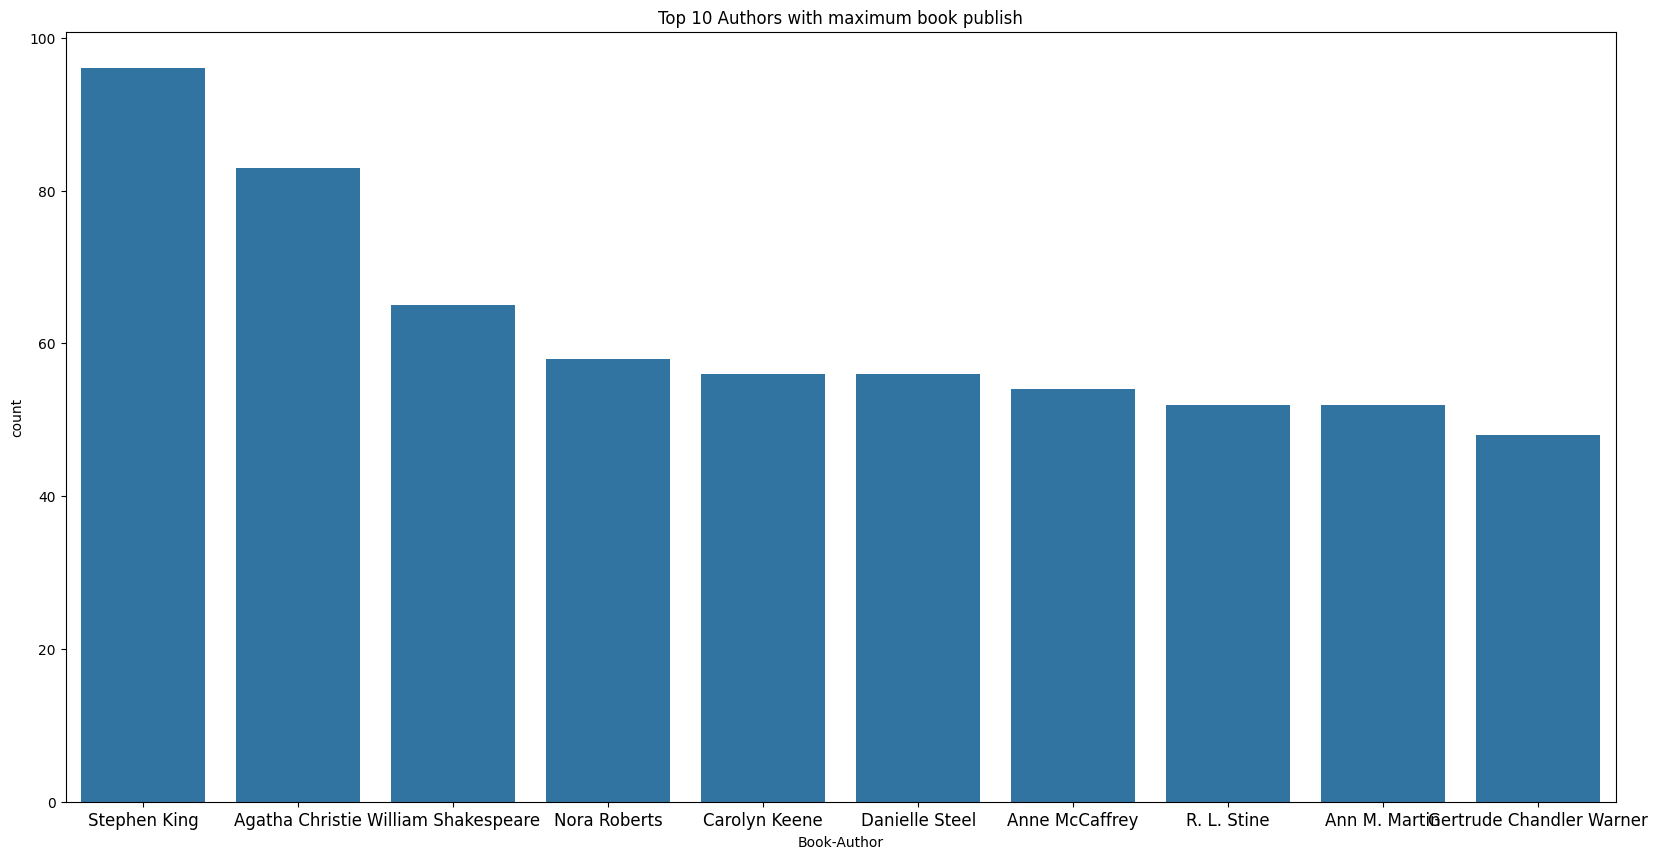

In [15]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Book-Author', data = books,
             order = books['Book-Author'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [16]:
book = books['Book-Title'].value_counts()[:20]
book

Book-Title
Wuthering Heights                                             6
The Subtle Knife (His Dark Materials, Book 2)                 6
The Hitchhiker's Guide to the Galaxy                          5
Fahrenheit 451                                                5
The Dead Zone                                                 5
Pride and Prejudice                                           5
The Wind in the Willows                                       5
The Amber Spyglass (His Dark Materials, Book 3)               5
Flame Of Recca (Flame Of Recca)                               5
A Little Princess                                             5
Pet Sematary                                                  5
Chobits (Chobits)                                             4
Breathing Lessons                                             4
The Fellowship of the Ring (The Lord of the Rings, Part 1)    4
Midnight Sun                                                  4
Temptation                   

C:\Users\HP\AppData\Local\Temp\ipykernel_12780\3759587104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


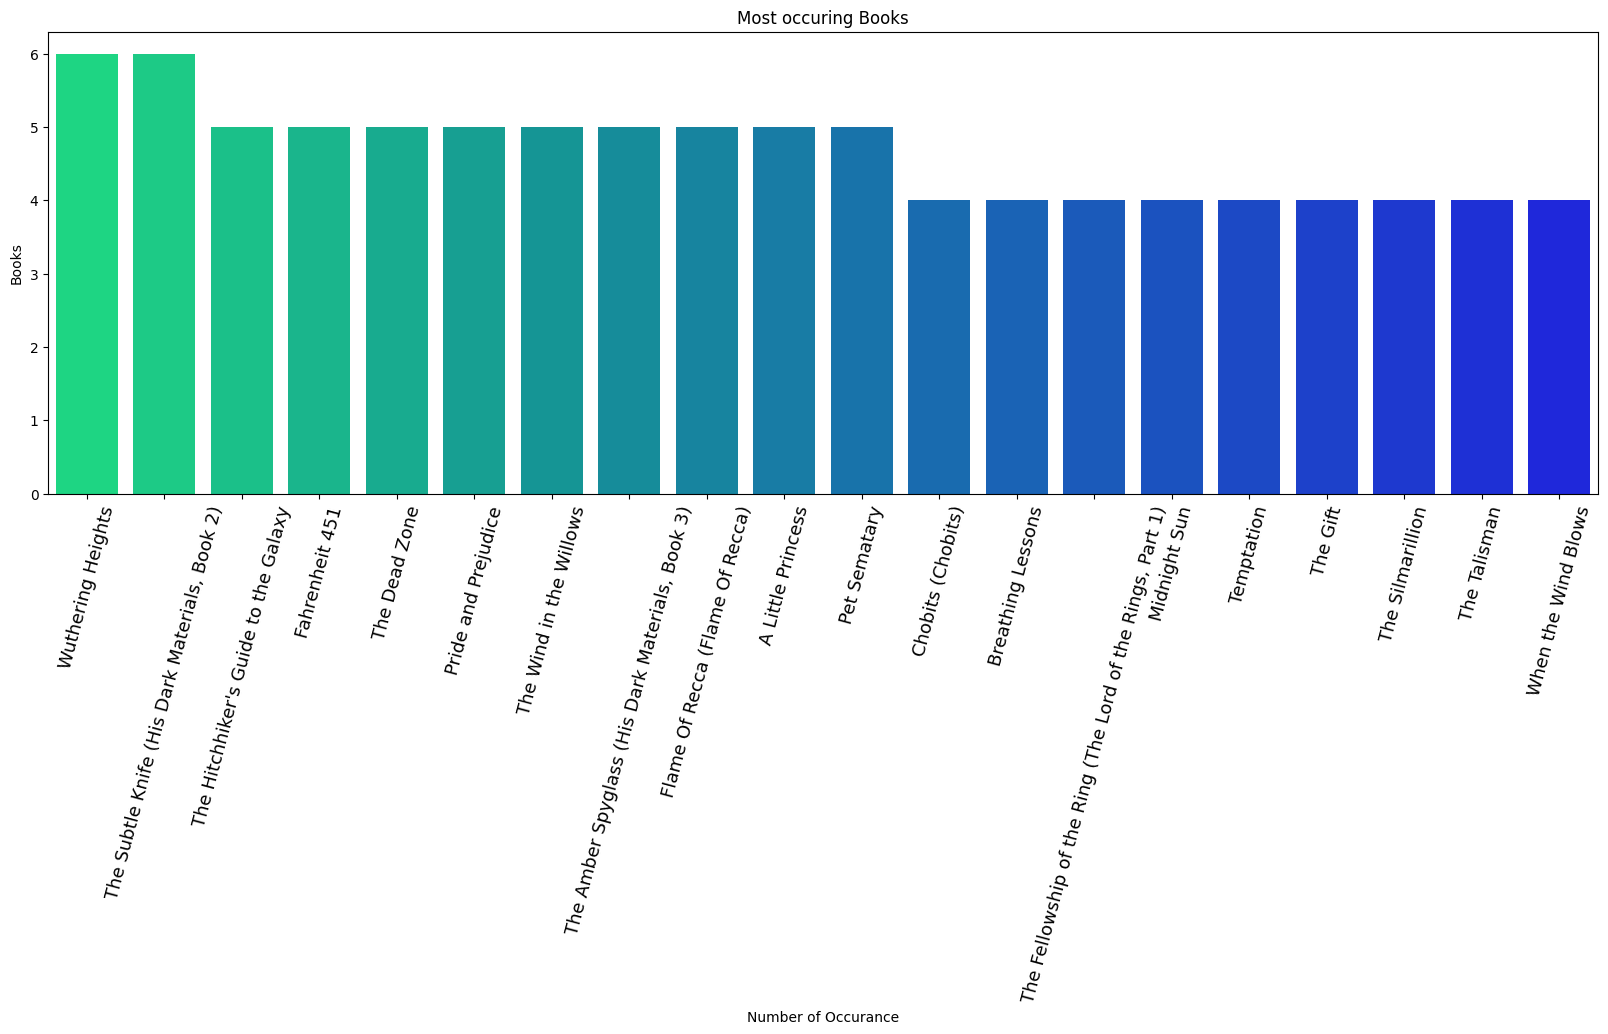

In [17]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = books['Book-Title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

In [18]:
publisher = books['Publisher'].value_counts()[:20]
publisher

Publisher
Pocket                      607
Ballantine Books            591
Harlequin                   585
Bantam Books                476
Berkley Publishing Group    435
Warner Books                379
Penguin Books               347
Avon                        339
Scholastic                  330
Signet Book                 326
Silhouette                  313
Fawcett Books               299
Bantam                      284
Simon &amp; Schuster        262
Vintage Books USA           244
Perennial                   229
Jove Books                  214
St. Martin's Press          209
Penguin USA                 205
Harpercollins               204
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12780\2859759146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')


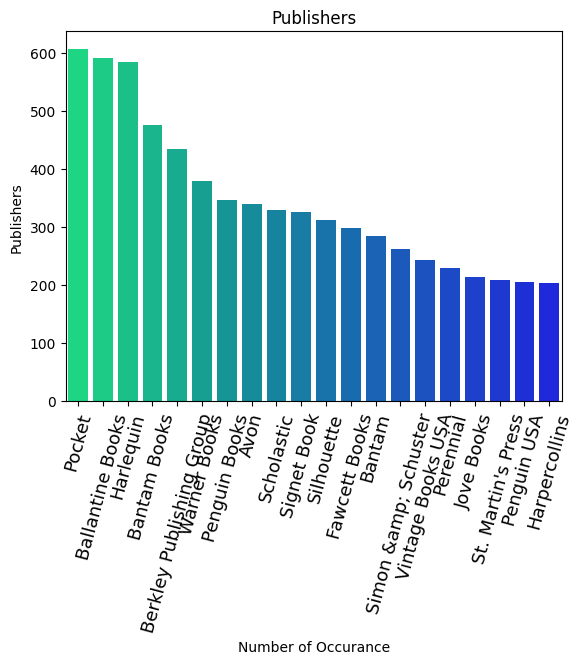

In [19]:
publisher = books['Publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

In [20]:
# Load and clean data
books = pd.read_csv('data/Books.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']].dropna().drop_duplicates()

# Add 'Genre' if available
if 'Genre' in books.columns:
    books['Genre'] = books['Genre'].fillna('')
else:
    books['Genre'] = ''

# Combine fields into one string
books['combined_features'] = (
    books['Book-Title'].astype(str) + " " +
    books['Book-Author'].astype(str) + " " +
    books['Publisher'].astype(str) + " " +
    books['Genre'].astype(str)
)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load and clean data
books = pd.read_csv('data/Books.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']].dropna().drop_duplicates()
books['Genre'] = books.get('Genre', '')  # if Genre exists

# Combine metadata fields
books['combined_features'] = (
    books['Book-Title'].astype(str) + " " +
    books['Book-Author'].astype(str) + " " +
    books['Publisher'].astype(str) + " " +
    books['Genre'].astype(str)
)

# Reset index to align with similarity matrix
books = books.reset_index(drop=True)

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])

# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Index map
indices = pd.Series(books.index, index=books['Book-Title'].str.lower()).drop_duplicates()

from difflib import get_close_matches

def recommend_books(title, top_n=10):
    title = title.lower()

    if title not in indices:
        close_matches = get_close_matches(title, indices.index, n=1, cutoff=0.6)
        if not close_matches:
            return f"No similar titles found for '{title}'"
        title = close_matches[0]

    idx = indices[title]
    sim_scores = cosine_sim[idx].flatten()
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    book_indices = [i[0] for i in sim_scores if i[0] < len(books)]

    return books.iloc[book_indices][['Book-Title', 'Book-Author', 'Publisher', 'Genre']]


In [24]:
print(recommend_books("hobbit", top_n=5))


                                Book-Title       Book-Author  \
17218                      El Silmarillion  J. R. R. Tolkien   
22413                           The Hobbit    J.R.R. Tolkien   
5984   The Hobbit: Or There and Back Again  J. R. R. Tolkien   
20104  The Hobbit: Or There and Back Again  J. R. R. Tolkien   
20345  The Hobbit: Or There and Back Again  J. R. R. Tolkien   

              Publisher Genre  
17218         Minotauro        
22413     HarperCollins        
5984   Ballantine Books        
20104         Not Avail        
20345         Not Avail        


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [26]:
import pandas as pd
import os
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load and clean dataset
books = pd.read_csv('data/Books.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)

# Select relevant columns
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']].dropna().drop_duplicates()

# If Genre column exists, use it. Else, create empty one.
if 'Genre' in books.columns:
    books['Genre'] = books['Genre'].fillna('')
else:
    books['Genre'] = ''

# Combine text features for TF-IDF
books['combined_features'] = (
    books['Book-Title'].astype(str) + " " +
    books['Book-Author'].astype(str) + " " +
    books['Publisher'].astype(str) + " " +
    books['Genre'].astype(str)
)

# Reset index to ensure alignment with similarity matrix
books = books.reset_index(drop=True)

# Fit TF-IDF Vectorizer
print("Fitting TF-IDF vectorizer...")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['combined_features'])

# Compute cosine similarity
print("Computing cosine similarity matrix...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Save models and matrix
os.makedirs('model', exist_ok=True)
joblib.dump(tfidf, 'model/tfidf_vectorizer.pkl')
joblib.dump(tfidf_matrix, 'model/tfidf_matrix.pkl')
joblib.dump(cosine_sim, 'model/cosine_sim.pkl')
books.to_csv('model/processed_books.csv', index=False)

print("Model training complete. Artifacts saved to /model")


Fitting TF-IDF vectorizer...
Computing cosine similarity matrix...
Model training complete. Artifacts saved to /model


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
books = pd.read_csv('data/Books.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
ratings = pd.read_csv('data/Ratings.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)

# Preprocessing
books = books[['ISBN', 'Book-Title']].dropna().drop_duplicates()
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]

# Merge for easier lookup
merged = ratings.merge(books, on='ISBN')

# Filter users with at least 5 ratings
user_counts = merged['User-ID'].value_counts()
valid_users = user_counts[user_counts >= 5].index
merged = merged[merged['User-ID'].isin(valid_users)]

# Fit TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['Book-Title'])

# Evaluation params
k = 5
precision_list = []
recall_list = []

# Sample users for evaluation
sample_users = merged['User-ID'].drop_duplicates().sample(100, random_state=42)

for user in sample_users:
    user_ratings = merged[merged['User-ID'] == user]
    train, test = train_test_split(user_ratings, test_size=0.4, random_state=42)

    liked_books = train[train['Book-Rating'] >= 7]['Book-Title'].tolist()
    if not liked_books:
        continue

    # Build user profile vector
    sim_scores = []
    for term in liked_books:
        term_vec = tfidf.transform([term])
        sim = cosine_similarity(term_vec, tfidf_matrix).flatten()
        sim_scores.append(sim)
    
    combined_sim = np.mean(sim_scores, axis=0)
    top_indices = combined_sim.argsort()[::-1]
    recommended_titles = books.iloc[top_indices]['Book-Title'].tolist()

    # Filter out already seen
    recommended_titles = [title for title in recommended_titles if title not in liked_books]
    recommended_titles = recommended_titles[:k]

    # Ground truth
    relevant_titles = test[test['Book-Rating'] >= 7]['Book-Title'].tolist()

    if not relevant_titles:
        continue

    hits = len(set(recommended_titles) & set(relevant_titles))
    precision = hits / k
    recall = hits / len(relevant_titles)

    precision_list.append(precision)
    recall_list.append(recall)

# Final results
print(f"Average Precision@{k}: {np.mean(precision_list):.4f}")
print(f"Average Recall@{k}: {np.mean(recall_list):.4f}")


Average Precision@5: 0.0071
Average Recall@5: 0.0198


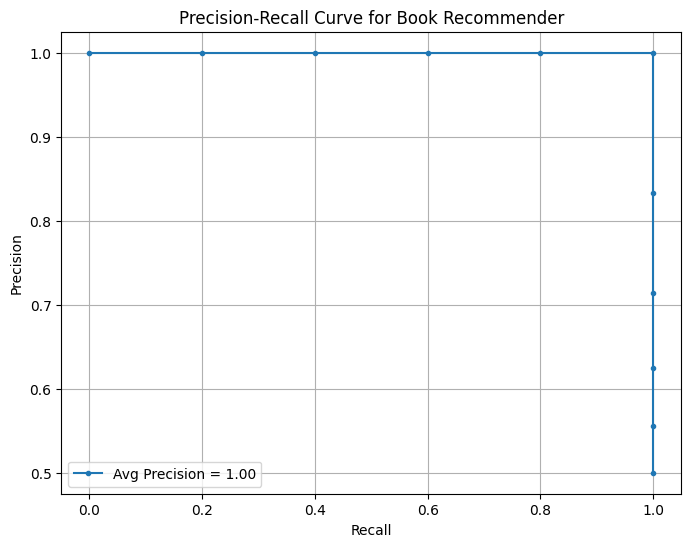

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Simulated predictions and true labels
# y_true = 1 if the user liked the book, 0 otherwise
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
# y_scores = similarity score or confidence from the recommender
y_scores = [0.9, 0.4, 0.85, 0.7, 0.2, 0.3, 0.95, 0.1, 0.8, 0.5]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Avg Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Book Recommender')
plt.legend()
plt.grid()
plt.show()


In [32]:
# 1 = Relevant (user liked), 0 = Not relevant (user didn't like)
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]  # actual relevance
y_pred = [1 if score >= 0.6 else 0 for score in [0.9, 0.4, 0.85, 0.7, 0.2, 0.3, 0.95, 0.1, 0.8, 0.5]]  # predicted labels


In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [28]:
import pandas as pd

def load_books(path='data/Books.csv'):
    books = pd.read_csv(path, sep=',', encoding='utf-8', on_bad_lines='skip', low_memory=False)
    books.columns = books.columns.str.strip()
    desired = ['ISBN', 'Book-Title', 'Book-Author', 'Image-URL-M', 'Publisher', 'Genre']
    books = books[[col for col in desired if col in books.columns]].dropna().drop_duplicates()
    books['Book-Title'] = books['Book-Title'].str.encode('utf-8', errors='ignore').str.decode('utf-8')
    books['Book-Author'] = books['Book-Author'].str.encode('utf-8', errors='ignore').str.decode('utf-8')
    return books

def load_ratings(path='data/Ratings.csv'):
    ratings = pd.read_csv(path, sep=',', encoding='utf-8', on_bad_lines='skip', low_memory=False)
    ratings.columns = ratings.columns.str.strip()
    rating_avg = ratings.groupby('ISBN')['Book-Rating'].mean().reset_index()
    rating_avg.columns = ['ISBN', 'Average-Rating']
    return rating_avg


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import streamlit as st

@st.cache_resource
def create_tfidf_matrix(titles):
    tfidf = TfidfVectorizer(stop_words='english')
    matrix = tfidf.fit_transform(titles)
    return tfidf, matrix

def compute_similarity(query, tfidf, matrix):
    query_vec = tfidf.transform([query])
    similarity = cosine_similarity(query_vec, matrix).flatten()
    return similarity


In [30]:
def trending_books(books_df):
    return books_df.sort_values(by='Average-Rating', ascending=False).drop_duplicates(subset='Book-Title').head(10)
